# 1D Vehicle Dynamic Simulation

Copyright &copy; 2024 [Joshua A. Marshall](https://www.ece.queensu.ca/people/j-marshall)

This simple simulation illustrates how to simulate the dynamical equations of motion for a simple 1D mobile robot.  

## Import Packages

We use [Numpy](https://numpy.org) for handling arrays and [Matplotlib](https://matplotlib.org) for plotting.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Simulation Setup

Set the simulation time as `SIM_TIME` [s], the sample period as `T` [s].

In [2]:
SIM_TIME = 30.0
T = 0.4

Set up an array of simulation times `t` and find the total number of simulation data points `N`.

In [3]:
t = np.arange(0, SIM_TIME, T)
N = np.size(t)

Set the mass `M` [kg] of the vehicle.

In [4]:
M = 10.0

Define the vehicle model matrices.

In [5]:
F = np.array([[1, T], [0, 1]])
G = np.array([[T ** 2 / (2 * M)], [T / M]])

Write a function to model the mobile robot's state `x` [m] as a function of the force input `u` [N].

In [6]:
def vehicle(x, u, F, G):
    """Discrete-time 1D dynamic vehicle model."""
    x_new = F @ x + G @ [u]
    return x_new

## Run the Simulation

Initialize the variables and run the simulation in a `for` loop.  Pick the proportional gain `k_P`.

In [7]:
# Initialize arrays that will be populated with our inputs and states
x = np.zeros((2, N))
u = np.zeros(N)

# Set the initial position [m], velocity [m/s], and force input [N]
x[0, 0] = 1.0
x[1, 0] = 0.0
u[0] = 0.0

# Run the simulation
for k in range(1, N):
    x[:, k] = vehicle(x[:, k - 1], u[k - 1], F, G)
    u[k] = np.sin(k * T)

## Plot the Simulation Output

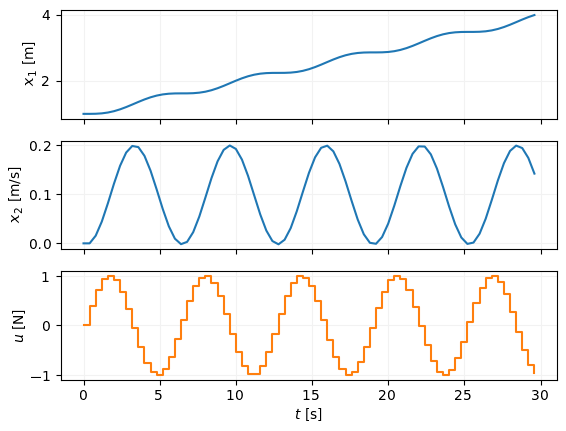

In [8]:
# Optional setup
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{arev,amsmath}")

# Plot the states (x) and input (u) vs time (t)
fig1 = plt.figure(1)
ax1a = plt.subplot(311)
plt.plot(t, x[0, :], "C0")
plt.grid(color="0.95")
plt.ylabel(r"$x_1$ [m]")
plt.setp(ax1a, xticklabels=[])
ax1b = plt.subplot(312)
plt.plot(t, x[1, :], "C0")
plt.grid(color="0.95")
plt.ylabel(r"$x_2$ [m/s]")
plt.setp(ax1b, xticklabels=[])
ax1c = plt.subplot(313)
plt.step(t, u, "C1", where="post")
plt.grid(color="0.95")
plt.ylabel(r"$u$ [N]")
plt.xlabel(r"$t$ [s]")
plt.show()